# Rando image generator

## Load Image

This only needs to be run once to select and image

This is the starting image:


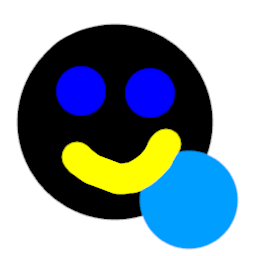

In [1]:
import numpy
import random
from PIL import Image, ImageDraw

rand = random.SystemRandom()

image_file = input("Enter the image file name: ")
source_image = Image.open(image_file).convert("RGB")
source_array = numpy.array(source_image)
print("This is the starting image:")
display(source_image)

## Initialize Run

This prepares initializes or resets the target image. Run this once per session, or to reset the progress.

White image:	MSE: 3.9373931884765625, PSNR: 42.17871575221851, AD: 2235679
Grey image:	MSE: 9.813379923502604, PSNR: 38.21261748053355, AD: 24287007
Black image:	MSE: 9.813379923502604, PSNR: 38.21261748053355, AD: 29380639
Initial difference: 9.813379923502604. Starting image:


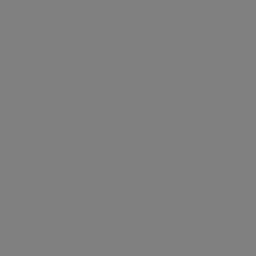

In [2]:
def random_xy(image):
    return (rand.randint(0, image.size[0] - 1), rand.randint(0, image.size[1] - 1))

def draw_random_line(draw, proposal):
    magnitude_ratio = difference / MAX_DIFFERENCE
    
    # Calculate how long the line should be based on the magnitude progress
    length_ratio = magnitude_ratio * CONFIG["line"]["magnitude_length_scale"]
    length_ratio = min(length_ratio, CONFIG["line"]["max_max_length_percent"])
    length_ratio = max(length_ratio, CONFIG["line"]["min_max_length_percent"])
    max_x_length = round(proposal.size[0] * length_ratio)
    max_y_length = round(proposal.size[1] * length_ratio)

    # Get the starting and ending points of the line
    start_xy = random_xy(proposal)
    end_xy = (rand.randint(max(0, start_xy[0] - max_x_length), min(proposal.size[0] - 1, start_xy[0] + max_x_length - 1)),
              rand.randint(max(0, start_xy[1] - max_y_length), min(proposal.size[1] - 1, start_xy[1] + max_y_length - 1)))
    
    # Calculate the width of the line based on the magnitude progress
    max_width = round(magnitude_ratio * CONFIG["line"]["magnitude_width_scale"] * CONFIG["line"]["max_max_width"])
    max_width = min(max_width, CONFIG["line"]["max_max_width"])
    max_width = max(max_width, CONFIG["line"]["min_max_width"])
    width = CONFIG["line"]["min_max_width"] if max_width == CONFIG["line"]["min_max_width"] else rand.randint(CONFIG["line"]["min_max_width"], max_width)
    
    draw.line(start_xy + end_xy, fill=rand.randint(0, 0xFFFFFF), width=width)

def mean_squared_error(image1_array, image2):
    """Calculate the mean squared error between two images."""
    return numpy.mean(numpy.square(image1_array - numpy.array(image2)))

def peak_signal_to_noise_ratio(image1_array, image2):
    """Calculate the peak signal to noise ratio between two images."""
    mse = mean_squared_error(image1_array, image2)
    return 10 * numpy.log10(255 ** 2 / mse)

def absolute_difference(image1_array, image2):
    """Calculate the absolute difference between two images."""
    return numpy.sum(numpy.abs(image1_array - numpy.array(image2)))

white_image = Image.new('RGB', source_image.size, color=0xFFFFFF)
grey_image = Image.new('RGB', source_image.size, color=0x808080)
black_image = Image.new('RGB', source_image.size, color=0x000000)

print(f"White image:\tMSE: {mean_squared_error(source_array, white_image)}, PSNR: {peak_signal_to_noise_ratio(source_array, white_image)}, AD: {absolute_difference(source_array, white_image)}")
print(f"Grey image:\tMSE: {mean_squared_error(source_array, grey_image)}, PSNR: {peak_signal_to_noise_ratio(source_array, grey_image)}, AD: {absolute_difference(source_array, grey_image)}")
print(f"Black image:\tMSE: {mean_squared_error(source_array, black_image)}, PSNR: {peak_signal_to_noise_ratio(source_array, black_image)}, AD: {absolute_difference(source_array, black_image)}")

target_image = grey_image
difference = mean_squared_error(source_array, target_image)
MAX_DIFFERENCE = difference
print(f"Initial difference: {difference}. Starting image:")
display(target_image)

frame = 0  # Frame counter

## Generate

Additional runs iterate on the same image unless reset above.

New difference: 4.18183	Frame: 414	Ticks: 1520	Difference percetage: 42.6136%
New difference: 4.18078	Frame: 415	Ticks: 8811	Difference percetage: 42.6028%
New difference: 4.17698	Frame: 416	Ticks: 8921	Difference percetage: 42.5641%
New difference: 4.17275	Frame: 417	Ticks: 9253	Difference percetage: 42.5211%
New difference: 4.17152	Frame: 418	Ticks: 19116	Difference percetage: 42.5085%
New difference: 4.17102	Frame: 419	Ticks: 19291	Difference percetage: 42.5034%
New difference: 4.16168	Frame: 420	Ticks: 20773	Difference percetage: 42.4082%
New difference: 4.16149	Frame: 421	Ticks: 23352	Difference percetage: 42.4063%
New difference: 4.16057	Frame: 422	Ticks: 34404	Difference percetage: 42.3969%
New difference: 4.15895	Frame: 423	Ticks: 38151	Difference percetage: 42.3804%
New difference: 4.15884	Frame: 424	Ticks: 38834	Difference percetage: 42.3793%
New difference: 4.15721	Frame: 425	Ticks: 39531	Difference percetage: 42.3626%
New difference: 4.15611	Frame: 426	Ticks: 42815	Differen

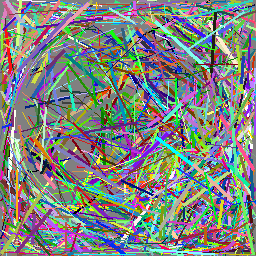

In [4]:
CONFIG = {
    "line": {
        "min_max_length_percent": 0.02,
        "max_max_length_percent": 1.0,
        "magnitude_length_scale": 1.0,
        "min_max_width": 1,
        "max_max_width": 10,
        "magnitude_width_scale": 1.0
    }
}

for i in range(10000000):
    proposal = target_image.copy()
    draw = ImageDraw.Draw(proposal)
    draw_random_line(draw, proposal)
    proposal_differcence = mean_squared_error(source_array, proposal)
    if proposal_differcence < difference:
        target_image = proposal
        difference = proposal_differcence
        print(f"New difference: {difference:.5f}\tFrame: {frame}\tTicks: {i}\tDifference percetage: {difference / MAX_DIFFERENCE * 100:.4f}%")
        with open(f"frames/frame{frame:06d}.png", "wb") as f:
            target_image.save(f)
            frame += 1
display(target_image)